# <Step1. 탐색> : 데이터의 기초 정보 살펴보기

In [26]:
import pandas as pd

file_path="python-data-analysis-master/data/chipotle.tsv"
#read.csv() 함수로 데이터를 데이터 프레임 형태(엑셀)로 불러옵니다.
chipo=pd.read_csv(file_path, sep= "\t")

In [27]:

print(chipo.shape)
print("--------------------------------")
print(chipo.info())

(4622, 5)
--------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


### [Chipotle 데이터셋의 행과 열, 데이터]

In [28]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [29]:
print(chipo.columns)
print("--------------------------------")
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
--------------------------------
RangeIndex(start=0, stop=4622, step=1)


### [Chipotle describe()함수로 기초 통계량 출력하기]

In [30]:
#order_id는 숫자의 의미를 가지지 않기 때문에 str으로 변환합니다.
chipo['order_id']=chipo['order_id'].astype(str)
# chipo 데이터 프레임 에서 수치형 피처들의 기초 통께량을 확인합니다
print(chipo.describe()) 

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


### [unique()함수로 범주형 피처 개수 출력하기]

In [31]:

print(len(chipo['order_id'].unique())) # order_id의 개수를 출력합니다.
print(len(chipo['item_name'].unique())) # item_name의 개수를 출력합니다.

1834
50


# <STEP 2>인사이트의 발견 : 탐색과 시각화하기

### [가장 많이 주문한 아이템 Top 10 출력하기]

In [32]:
# 가장 많이 주문한 아이템 Top 10 출력하기
item_count=chipo['item_name'].value_counts()[:10]
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
    print("TOP", idx, ":", val,cnt)

TOP 1 : Chicken Bowl 726
TOP 2 : Chicken Burrito 553
TOP 3 : Chips and Guacamole 479
TOP 4 : Steak Burrito 368
TOP 5 : Canned Soft Drink 301
TOP 6 : Steak Bowl 211
TOP 7 : Chips 211
TOP 8 : Bottled Water 162
TOP 9 : Chicken Soft Tacos 115
TOP 10 : Chips and Fresh Tomato Salsa 110


C:\Users\GR\AppData\Local\Temp\ipykernel_2828\3258803366.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):


### [아이템별 주문 개수와 총량구하기]

In [33]:
#아이템별 주문 개수와 총량구하기
order_count=chipo.groupby('item_name')['order_id'].count()
order_count[:10] # 아이템별 주문 개수를 출력합니다


item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [34]:

item_quantity=chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10] #

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

### [시각화] 시각화로 분석 결과 살펴보기

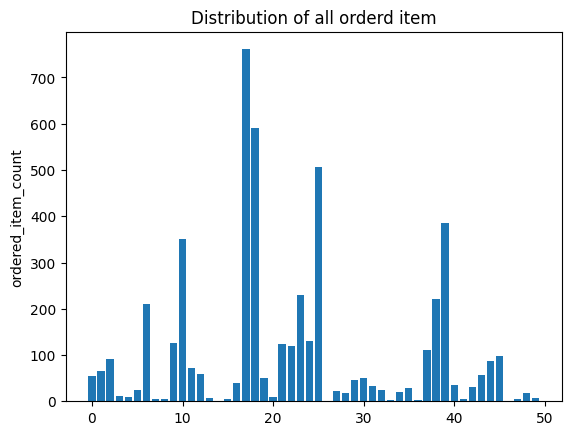

In [35]:
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist()
x_pos=np.arange(len(item_name_list))
order_cnt=item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align="center")
plt.ylabel("ordered_item_count")
plt.title('Distribution of all orderd item')

plt.show()

# <STEP 3> 데이터 전처리 : 전처리 함수 사용하기

In [36]:
# 데이터 전처리: 함수 사용하기
print(chipo)
print("-----------")
chipo["item_price"].head()

     order_id  quantity                              item_name  \
0           1         1           Chips and Fresh Tomato Salsa   
1           1         1                                   Izze   
2           1         1                       Nantucket Nectar   
3           1         1  Chips and Tomatillo-Green Chili Salsa   
4           2         2                           Chicken Bowl   
...       ...       ...                                    ...   
4617     1833         1                          Steak Burrito   
4618     1833         1                          Steak Burrito   
4619     1834         1                     Chicken Salad Bowl   
4620     1834         1                     Chicken Salad Bowl   
4621     1834         1                     Chicken Salad Bowl   

                                     choice_description item_price  
0                                                   NaN     $2.39   
1                                          [Clementine]     $3.39   


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

### [apply() 함수와 lambda를 이용해 데이터 전처리하기]

In [37]:
#colum 단위 데이터에 apply() 함수로 전처리를 적용합니다.
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
print(chipo.describe())

          quantity   item_price
count  4622.000000  4622.000000
mean      1.075725     7.464336
std       0.410186     4.245557
min       1.000000     1.090000
25%       1.000000     3.390000
50%       1.000000     8.750000
75%       1.000000     9.250000
max      15.000000    44.250000


# <STEP 4> 탐색적 분석 : 스무고개로 개념적 탐색 분석하기

### [주문당 평균 계산금액 출력하기]

In [38]:
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428568

### [한 주문에 10달러 이상 지불한 주문번호(id) 출력하기]

In [40]:
chipo_orderid_group=chipo.groupby("order_id").sum()
results = chipo_orderid_group[chipo_orderid_group.item_price >= 10]
print(results[:10])
print(results.index.values)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
1002             2       10.68
1003             2       13.00
1004             2       21.96
1005             3       12.15
1006             8       71.40
['1' '10' '100' ... '997' '998' '999']


C:\Users\GR\AppData\Local\Temp\ipykernel_2828\1761390870.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chipo_orderid_group=chipo.groupby("order_id").sum()
